In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import librosa
from librosa import display
import IPython.display as ipd
from util import classes as cls
from util import simplefast
from matrixprofile import matrixProfile

In [2]:
hop_length = 2**11
m = 300

def calculate_matrix_profile(song, m, hop_length):
    chroma_stft = song.chroma_cqt(hop_length=hop_length)
    return simplefast.simpleself(chroma_stft, m)

def calculate_matrix_profile_isft(song, m, hop_length):
    chroma_stft = song.chroma_cqt(hop_length=hop_length)
    istft = librosa.core.istft(chroma_stft)
    return matrixProfile.stomp(istft, m)


def normalize(x):
    return (x/np.amax(x))**2

def calculate_profiles(songs, method=calculate_matrix_profile):
    profiles = []
    for song in songs:
        arr = []
        for mi in [m/4, m/3, m/2, m, m*2, m*3, m*4]:
            arr.append(method(song, int(mi), hop_length))
        profiles.append(arr)        

def plot_profiles(songs):
    plt.figure(figsize=(18, 14))
    idx = 0
    for song in songs:
        plt.subplot(len(songs), 1, idx+1)
        prfs = profiles[idx]
        for prf in prfs:
            plt.plot(normalize(prf[0]))
        idx+=1
    plt.tight_layout()

def plot_indexes(songs):
    plt.figure(figsize=(18, 16))
    idx = 0
    for song in songs:
        plt.subplot(len(songs), 1, idx+1)
        prfs = profiles[idx]
        for prf in prfs:
            plt.plot(prf[1], 'o', alpha=0.6)
        idx+=1
    plt.tight_layout()    

In [3]:
song1 = cls.Song('/dataset/YTCdataset/letitbe/v0.mp3')
song2 = cls.Song('/dataset/YTCdataset/letitbe/v1.mp3')
song3 = cls.Song('/dataset/YTCdataset/letitbe/v2.mp3')
song4 = cls.Song('/dataset/YTCdataset/letitbe/v3.mp3')
songs = [song1, song2, song3, song4]
calculate_profiles(songs)

ValueError: operands could not be broadcast together with shapes (1,1025) (0,) 

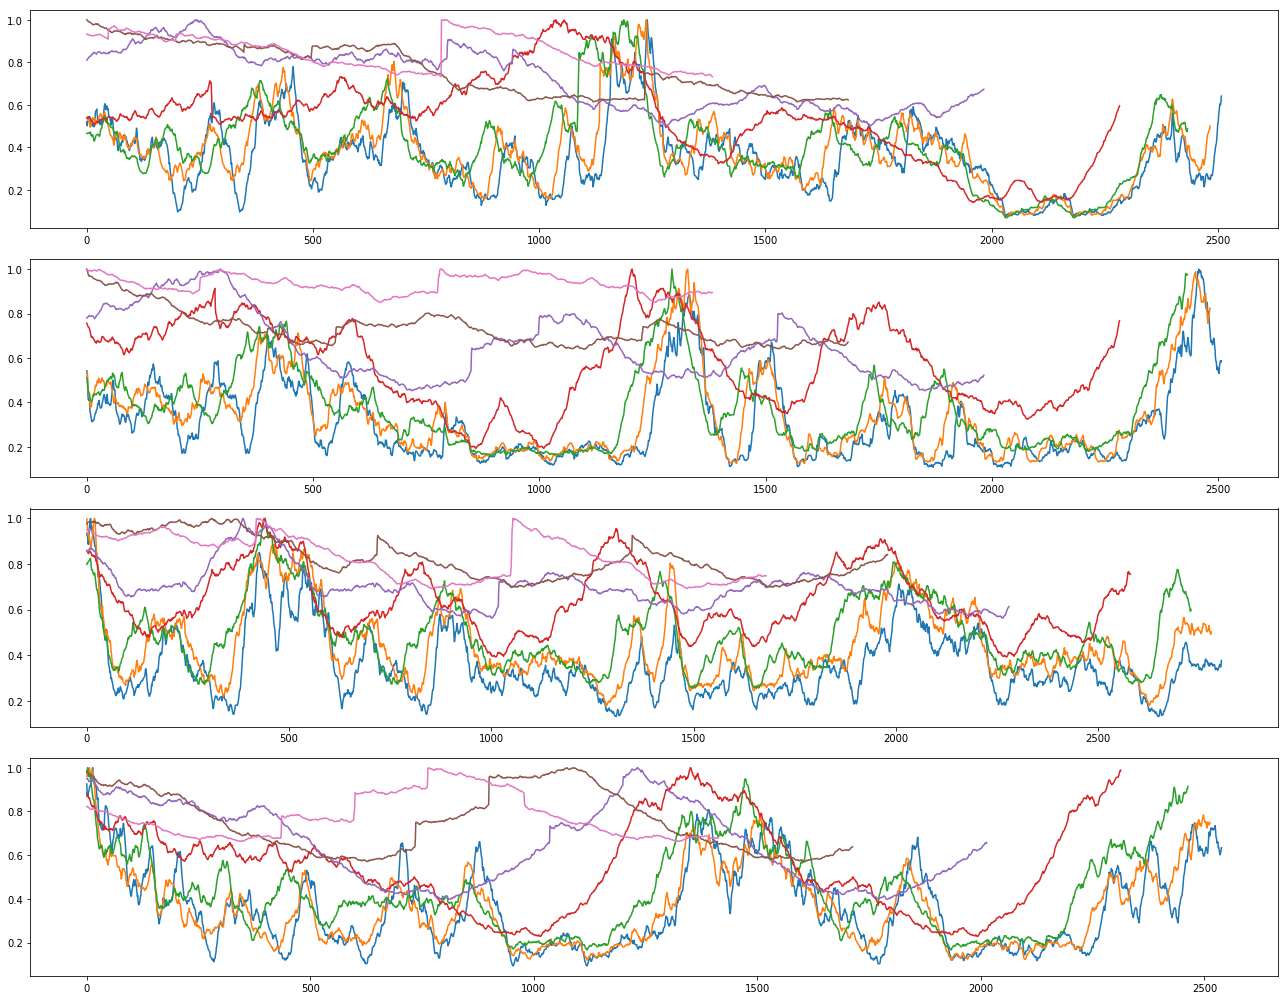

In [119]:
plot_profiles(songs)

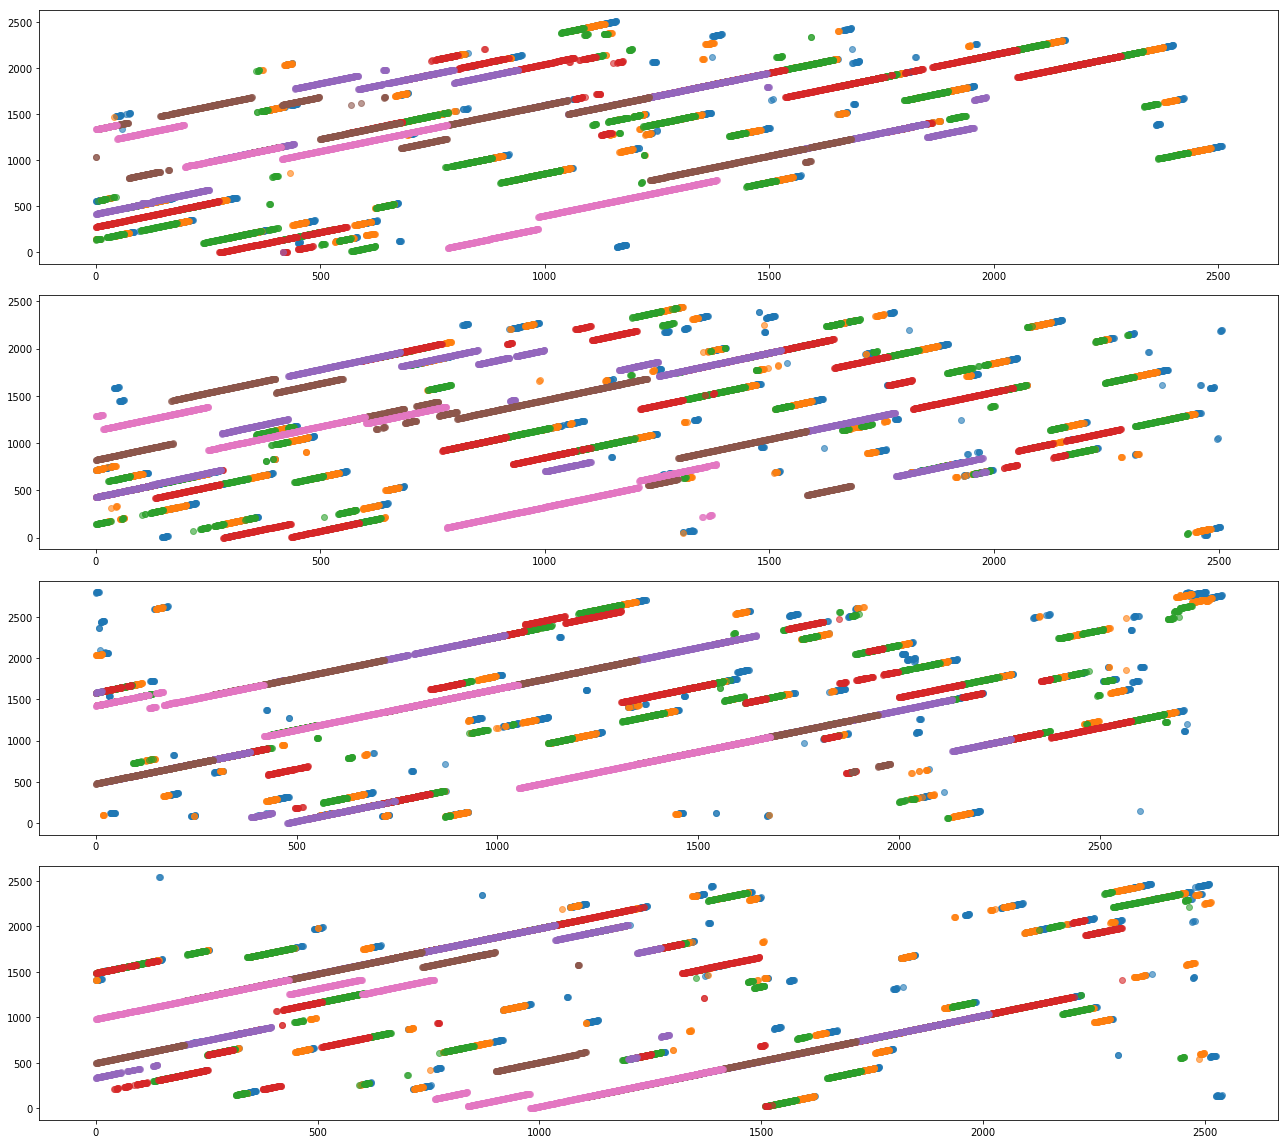

In [120]:
plot_indexes(songs)

In [112]:
song1 = cls.Song('/dataset/YTCdataset/jbg/v0.mp3')
song2 = cls.Song('/dataset/YTCdataset/jbg/v1.mp3')
song3 = cls.Song('/dataset/YTCdataset/jbg/v2.mp3')
song4 = cls.Song('/dataset/YTCdataset/jbg/v3.mp3')
songs = [song1, song2, song3, song4]
#calculate_profiles(songs, calculate_matrix_profile_isft)
calculate_profiles(songs)

/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


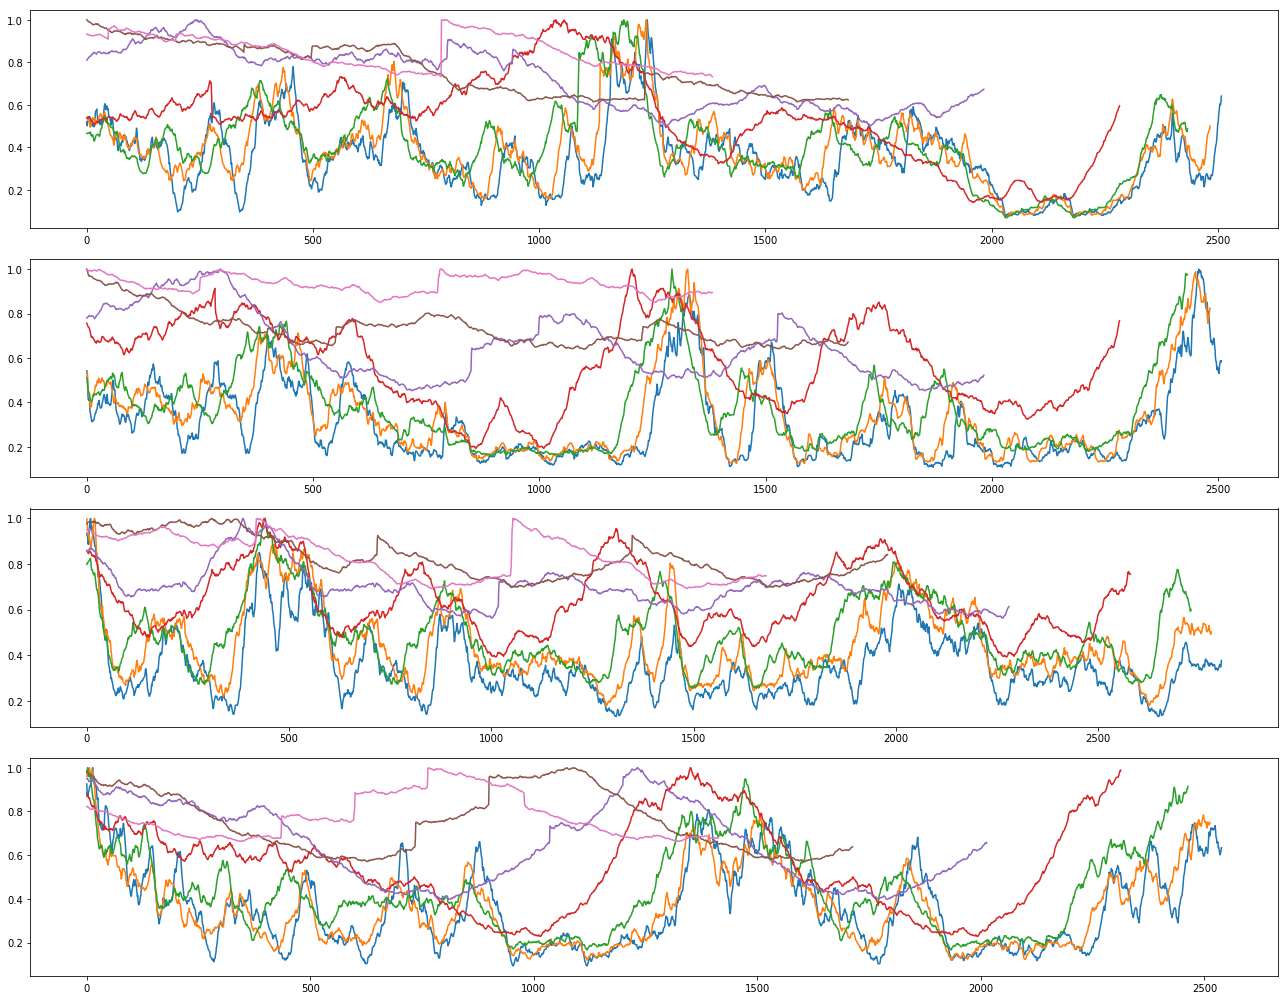

In [113]:
plot_profiles(songs)

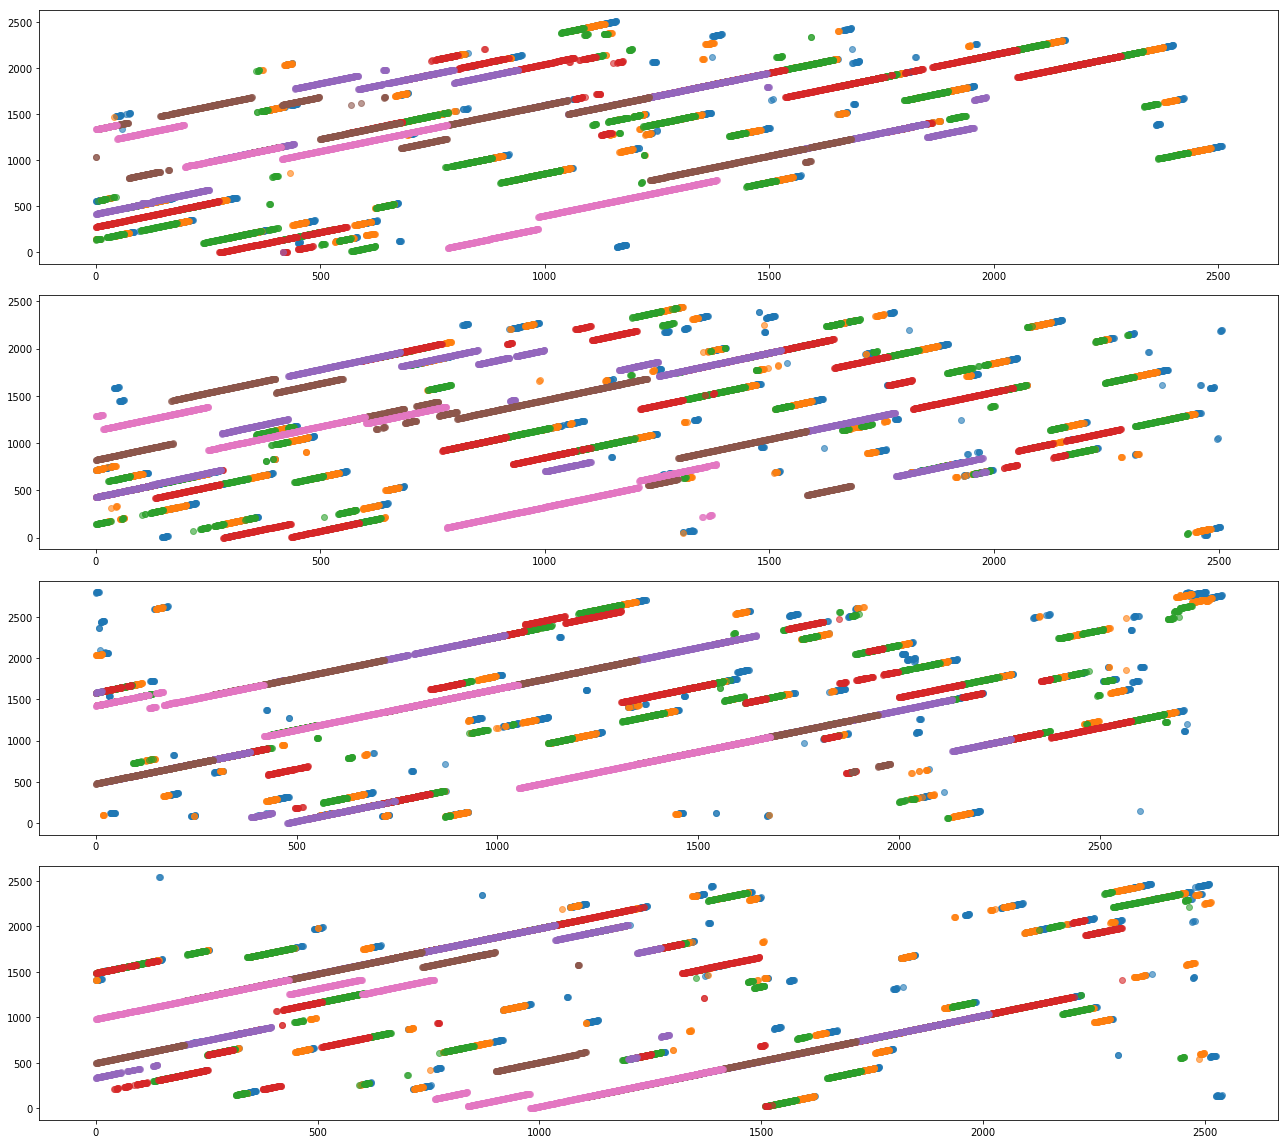

In [114]:
plot_indexes(songs)